# **Step1:Data Loading and Intial Exploration**

  - `Loading the datasets using pandas`
  - `Preview the data set using .head()`
  - `check data types using .info()`
  - `check for null values using .isnull().sum()`
  - `check for duplicates using .duplicated().sum()`

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd

#loading the datasets
students = pd.read_csv('/content/drive/MyDrive/Internship/students.csv')

courses = pd.read_csv('/content/drive/MyDrive/Internship/course_activity.csv')

feedback = pd.read_csv('/content/drive/MyDrive/Internship/feedback.csv')


# preview the datasets
print("Students Data")
print(students.head())
print()

print("Courses Data")
print(courses.head())
print()

print("Students feedback")
print(feedback.head())
print()


# checking datatypes and basic info
print("Students Data Info")
print(students.info())
print()

print("Courses Data info")
print(courses.info())
print()

print("Feedback Data info")
print(feedback.info())
print()


#checking for null values
print("Null values")
print("Students" , students.isnull().sum())
print()
print('Courses' , courses.isnull().sum())
print()
print('FeedBack' , feedback.isnull().sum())
print()

# checking for Duplicates
print("Duplicate values")
print("Students" , students.duplicated().sum())
print("Courses" , courses.duplicated().sum())
print("FeedBack" , feedback.duplicated().sum())



Students Data
  Student_ID       Name  Age  Gender   Location Enrolment_Date
0       S001  Student_1   24  Female    Kolkata     24/11/2023
1       S002  Student_2   32   Other    Chennai     27/02/2023
2       S003  Student_3   28   Other     Mumbai     13/01/2023
3       S004  Student_4   25  Female  Bangalore     21/05/2023
4       S005  Student_5   24   Other      Delhi     06/05/2023

Courses Data
  Student_ID Course_ID        Date  Time_Spent_Minutes  Completion_Percentage
0       S001     PY202  05/01/2024                  90                  46.10
1       S001     DM101  28/01/2024                 155                  88.87
2       S001     UX303  28/01/2024                 177                  54.93
3       S002     PY202  03/02/2024                  45                  32.20
4       S002     UX303  15/03/2024                 119                  90.80

Students feedback
  Student_ID Course_ID  Rating       Feedback_Text
0       S057     UX303       2      Too fast-paced
1    

**Observations**

**1.Students data**
  - Columns: Student_id , Name , Age , Gender , Location , Enrollment_date
  - Data Quality:

    No missing values

    No duplicates

    Data types are mostly correct but enrollment_date need to convert from string format to Datetime




**2.Courses Data**
  - Columns: Student_Id , Course_id , Date , time_spent_minutes , completion_percentage

  - Data quality:

    No missing values

    No duplicates

    Date is in string format and needs conversion to datetime

**3.feedback data**

  - Columns: Student_ID, Course_ID, Rating, Feedback_Text

  - Data Quality:

    No missing values

    No duplicates

    Rating is an int and seems fine, but should confirm if all values are within 1–5


# step2:Data cleaning

students Data : Enrolment_Date - Convert to datetime format

courses Data : 	Date- Convert to datetime format

feedback data : Rating	Check if it’s within expected range (1–5)

All datasets	Gender	Check for consistent spelling

In [8]:
# Converting date columns to data time
students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'] , format ='%d/%m/%Y')
courses['Date'] = pd.to_datetime(courses['Date'] , format = '%d/%m/%Y')


# checking for gender values
print("Gender Distribution" , students['Gender'].value_counts())

#Clean gender colum
students['Gender'] = students['Gender'].str.capitalize()

# validate Ratings range
print(f"Rating range: {feedback['Rating'].unique()}")



Gender Distribution Gender
Other     36
Male      34
Female    30
Name: count, dtype: int64
Rating range: [2 4 5 1 3]


**Observations (Data Cleaning)**

**Gender Distribution**

Other: 36 students

Male: 34 students

Female: 30 students

No inconsistencies (all values are properly capitalized and meaningful)

**Rating Range**

[1, 2, 3, 4, 5] — all values fall within a valid feedback range. No outliers or invalid ratings

Conclusion: our data is clean and ready for analysis.

# **Step3: Exploratory Data Analysis**

**Demographic analysis (age, gender, location)**

**Course activity analysis (engagement & completion)**

**Feedback analysis (ratings & comments)**

### **Student Demographic Analysis**

- Age Distribution
- Gender Distribution
- Location Breakdown

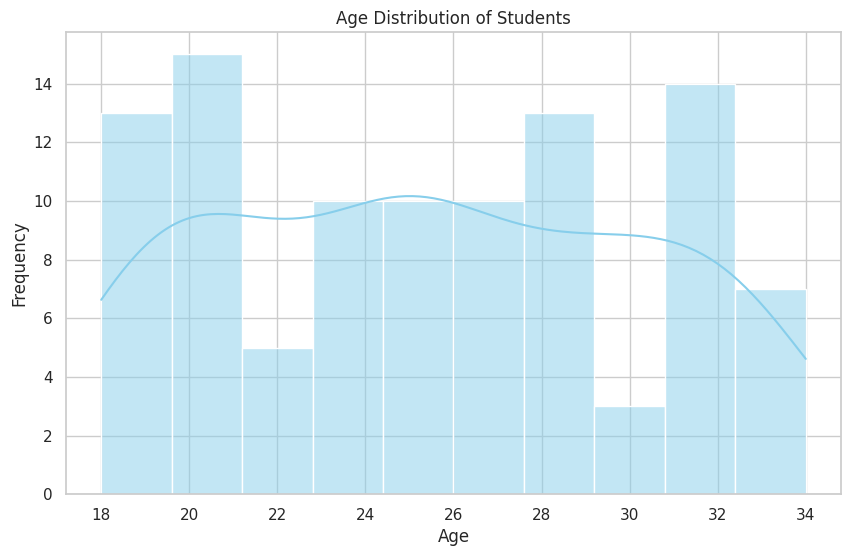

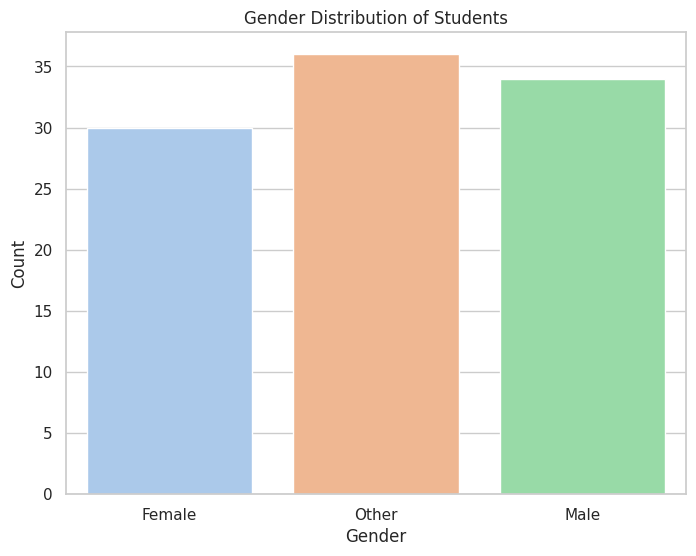

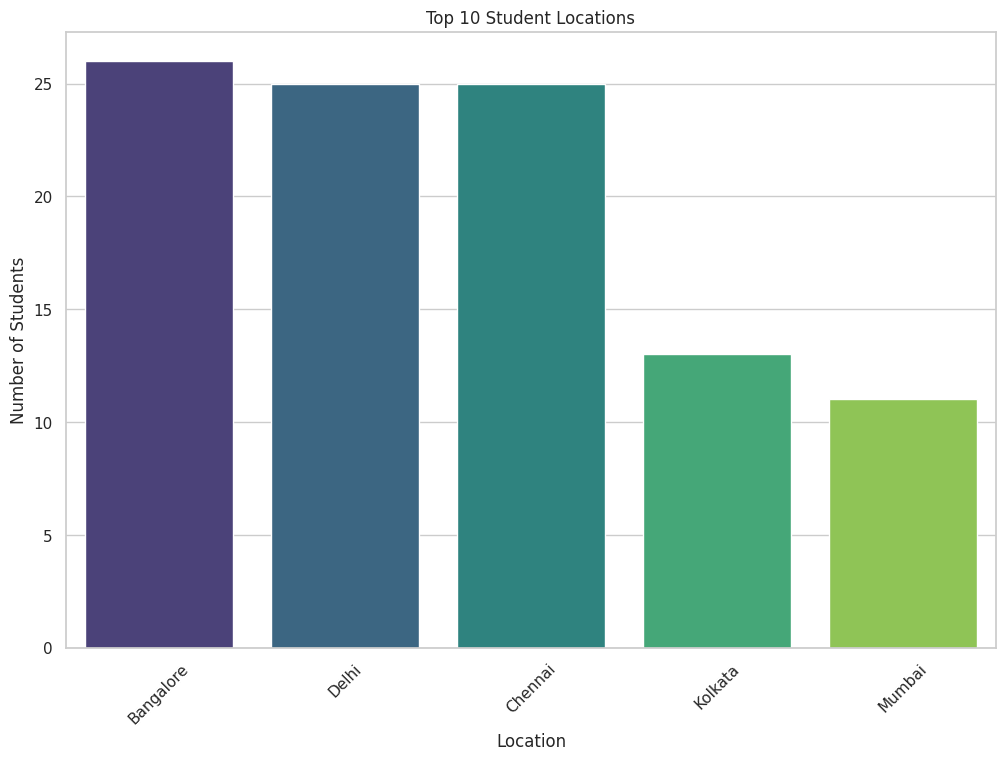

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set(style = "whitegrid")


# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(students['Age'] , kde=True , bins=10 , color='skyblue')
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Gender Distribution
plt.figure(figsize=(8,6))
sns.countplot(data=students , x='Gender' , palette = 'pastel')
plt.title('Gender Distribution of Students')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# location breakdown
plt.figure(figsize=(12,8))
top_locations = students['Location'].value_counts().nlargest(10)
sns.barplot(x=top_locations.index , y=top_locations.values , palette='viridis')
plt.title('Top 10 Student Locations')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation = 45)
plt.show()

### **Course activity analysis**

### Enrollment Trend Analysis

Text(0, 0.5, 'Number of Enrollments')

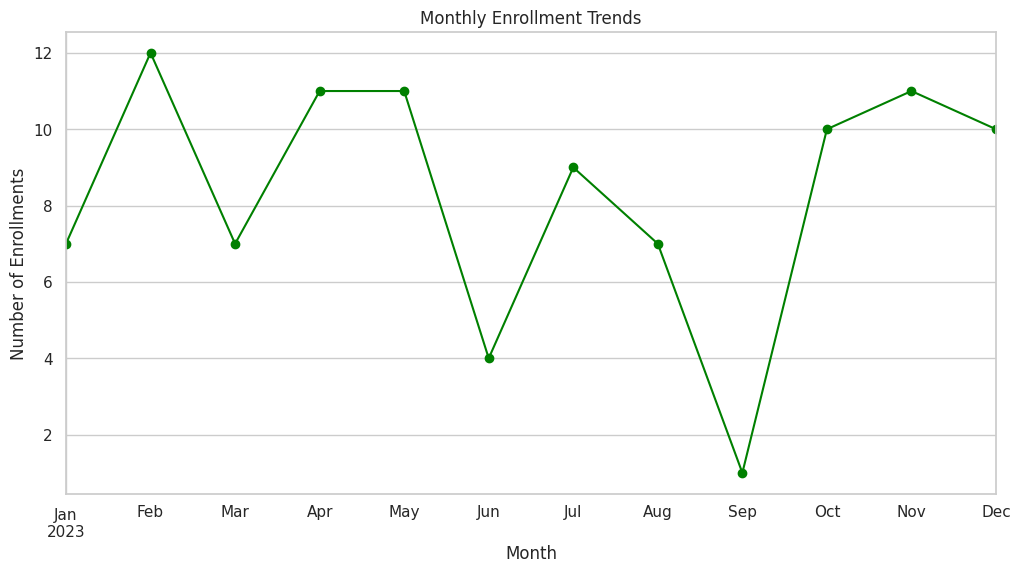

In [15]:
# convert enrollment date to datetime
students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'] , dayfirst=True)

#monthly enrollments
monthly_enrol = students['Enrolment_Date'].dt.to_period('M').value_counts().sort_index()

#plot
plt.figure(figsize=(12,6))
monthly_enrol.plot(kind='line', marker='o', color='green')
plt.title('Monthly Enrollment Trends')
plt.xlabel('Month')
plt.ylabel('Number of Enrollments')

### **Course ACtivity Summary**

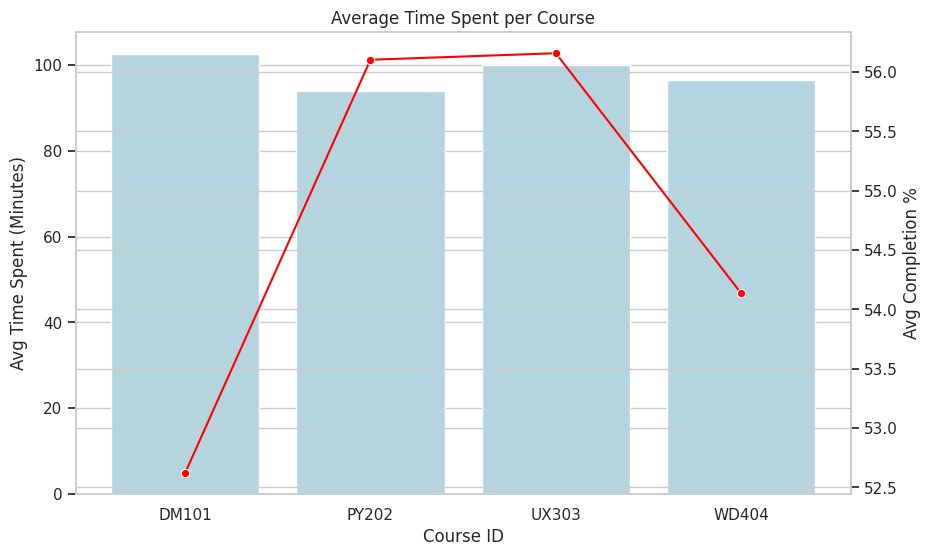

In [17]:
# Average time spent & completion per course
course_summary = courses.groupby('Course_ID')[['Time_Spent_Minutes', 'Completion_Percentage']].mean().reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(data=course_summary, x='Course_ID', y='Time_Spent_Minutes', ax=ax1, color='lightblue')
ax1.set_ylabel('Avg Time Spent (Minutes)')
ax1.set_xlabel('Course ID')
ax1.set_title('Average Time Spent per Course')

# Plot Completion Percentage on secondary axis
ax2 = ax1.twinx()
sns.lineplot(data=course_summary, x='Course_ID', y='Completion_Percentage', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Avg Completion %')
plt.show()


### Engagement = Time Spent per Course

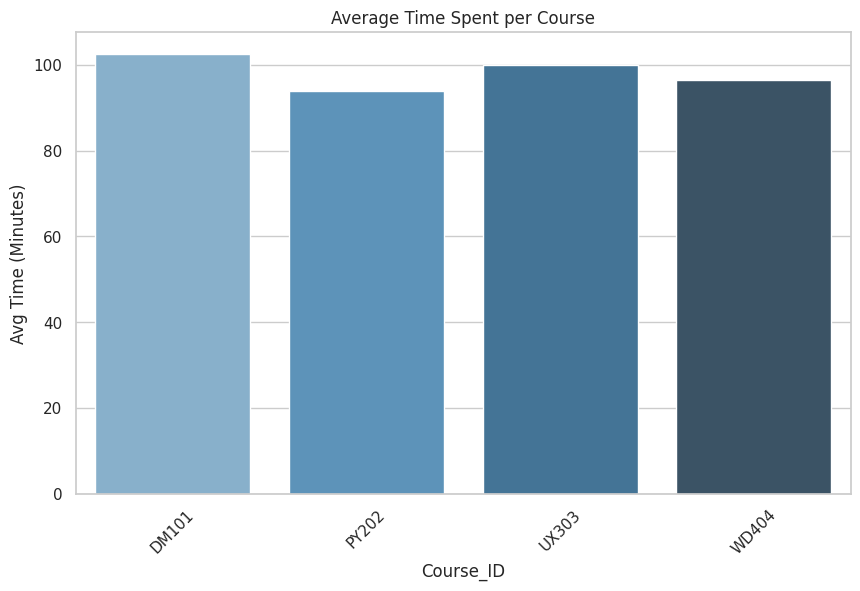

In [18]:
course_engage = courses.groupby('Course_ID')['Time_Spent_Minutes'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=course_engage, x='Course_ID', y='Time_Spent_Minutes', palette='Blues_d')
plt.title('Average Time Spent per Course')
plt.ylabel('Avg Time (Minutes)')
plt.xticks(rotation=45)
plt.show()


### Completion Rate per Course

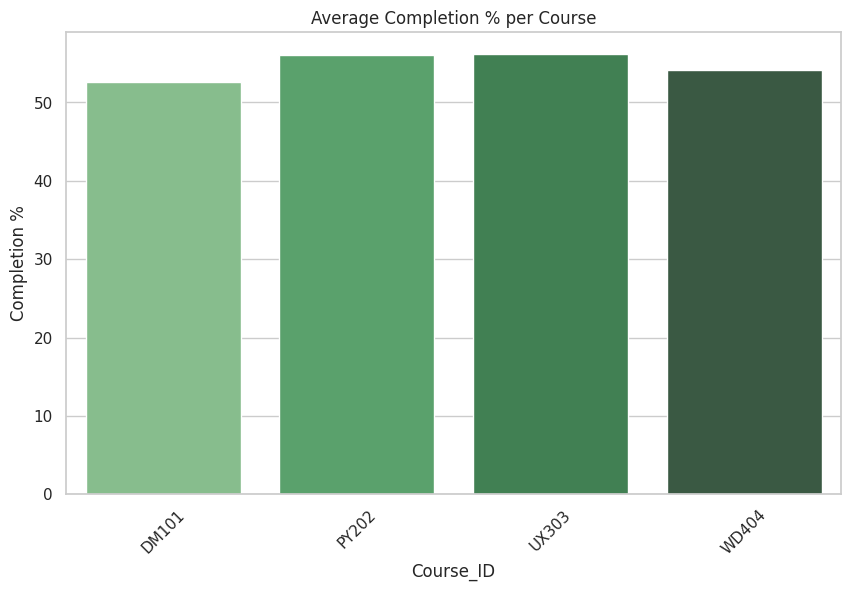

In [19]:
course_completion = courses.groupby('Course_ID')['Completion_Percentage'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=course_completion, x='Course_ID', y='Completion_Percentage', palette='Greens_d')
plt.title('Average Completion % per Course')
plt.ylabel('Completion %')
plt.xticks(rotation=45)
plt.show()


### **FeedBAck**

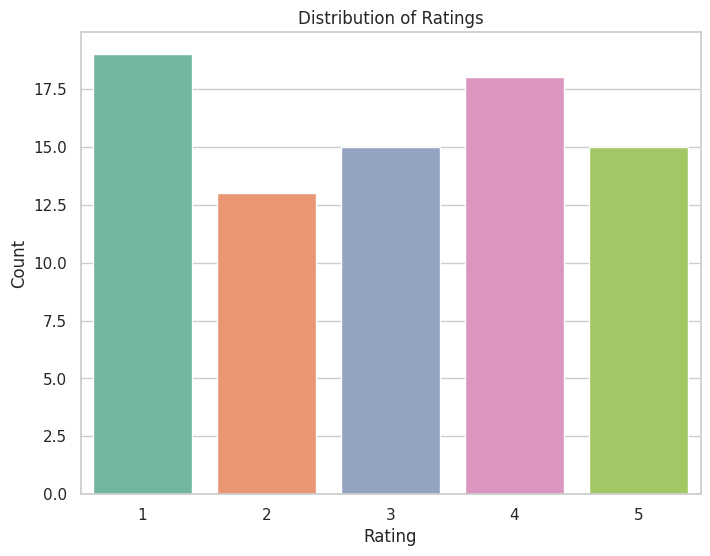

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(data=feedback, x='Rating', palette='Set2')
plt.title('Distribution of Ratings')
plt.ylabel('Count')
plt.show()


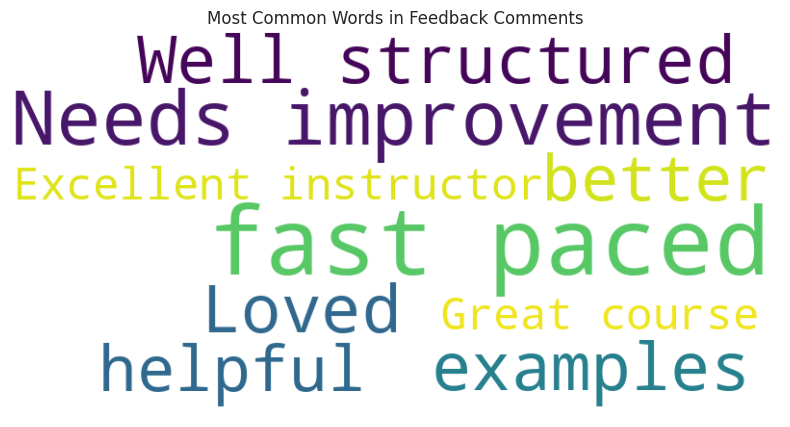

In [24]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(comment for comment in feedback['Feedback_Text'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Feedback Comments')
plt.show()


### INSIGHTS

**1. Student Demographics**

Balanced Gender Representation: The student population is evenly distributed among Male, Female, and Other genders, reflecting inclusive participation.

Age Peaks at 21–22 and 30–32: Indicates two key learner groups – young students (likely undergrads) and working professionals (upskilling or career shifting).

Location Hotspots: Certain cities like Kolkata, Mumbai, and Bangalore show higher enrollment — these can be targeted for location-based marketing or partnerships.

**2. Course Engagement & Completion**

High Time, Low Completion Courses: Some courses have high engagement but low completion, hinting at potential UX or content structure issues.

Top Courses Identified by Time Spent: Courses like DM101 and UX303 have consistently high time spent, indicating strong content or challenging material.

Course Drop-Off Analysis: Low completion percentages on certain courses may suggest:

Lack of motivation

Poor pacing

Overly difficult modules

**Action: Review low-performing courses for potential re-structuring or adding support material like quizzes and recap videos.**


**3. Feedback Insights**

Positive Feedback Dominates: Majority of students rate 4 or 5, signaling satisfaction with course content and delivery.

Common Praise Themes:

“Good examples”, “clear explanation”, “easy to follow”.

Courses that integrate real-world use cases receive better ratings.

Constructive Criticism:

Some comments include “too fast-paced”, “could be better”, and “needs improvement” — these flag courses that need refinement.

WordCloud Analysis:

Frequent terms include interactive, examples, structure, fast-paced — guiding curriculum focus.

Course-wise Feedback Patterns:

Courses like UX303 have polarizing feedback (high time spent, mixed ratings) — indicating value but possibly uneven difficulty.

**Business Recommendations**

**Course Optimization:** Focus on improving pacing and clarity in courses flagged by feedback and completion data.

**Marketing Focus:** Target cities with high student density for campaigns or offline events.

**Inclusive Curriculum:** Maintain inclusive content and community for diverse gender representation.

**Add Support Mechanisms:** Consider TA sessions, weekly Q&A, or discussion forums for harder courses.

In [25]:
students.to_csv('cleaned_students.csv', index=False)
courses.to_csv('cleaned_course_activity.csv', index=False)
feedback.to_csv('cleaned_feedback.csv', index=False)